In [54]:
# Dependencies
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
# Import csv file as DataFrame
yc_df = pd.read_csv("yelp_census_data.csv")
yc_df.head()

,Median Age,Population,White,Black,Asian,Hispanic,Poverty Count,Household Income,Per Capita Income,Zip Code,Review Count,Average Rating,Rating Delta
0,22.0,9337,5974,1637,713,2160,815,49279,17884,92310,208,2.51,1.0
1,41.3,657,321,0,9,532,21,68750,21025,95653,772,3.04,1.0
2,45.8,232,232,0,0,76,13,38984,19150,95698,873,3.09,1.0
3,35.2,430,186,0,0,348,35,75708,22071,95697,1034,3.20,1.0
4,47.8,3882,3359,100,175,1134,381,75466,37323,95258,1498,3.22,1.0


In [56]:
poverty_rate = yc_df["Poverty Count"]/yc_df["Population"]*100
white_rate = yc_df["White"]/yc_df["Population"]*100

yc_fin_df = pd.DataFrame({"Zip Code": yc_df["Zip Code"], 
                                 "Poverty Rate": poverty_rate,
                                 "Household Income":yc_df["Household Income"],
                                 "Per Capita Income":yc_df["Per Capita Income"],
                                 "Review Count": yc_df["Review Count"],
                                 "Average Delta": yc_df["Rating Delta"] })

#Update variables to limit to 2 decimal
yc_fin_df["Poverty Rate"] = yc_fin_df["Poverty Rate"].map("{:,.2f}".format)
yc_fin_df["Average Delta"] = yc_fin_df["Average Delta"].map("{:,.2f}".format)

yc_fin_df.head()

,Average Delta,Household Income,Per Capita Income,Poverty Rate,Review Count,Zip Code
0,1.00,49279,17884,8.73,208,92310
1,1.00,68750,21025,3.20,772,95653
2,1.00,38984,19150,5.60,873,95698
3,1.00,75708,22071,8.14,1034,95697
4,1.00,75466,37323,9.81,1498,95258


In [57]:
yc_fin_df["Average Delta"] = pd.to_numeric(yc_fin_df["Average Delta"], downcast="float")

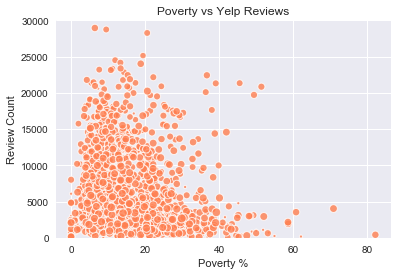

In [59]:
# Build the bubble plots
plt.scatter(poverty_rate, 
            yc_fin_df["Review Count"], 
            s=yc_fin_df["Average Delta"]*10, c="coral", 
            edgecolor="white", linewidths=1, marker="o", 
            alpha=0.8, label="Poverty")

# Incorporate the other graph properties
plt.title("Poverty vs Yelp Reviews")
plt.ylabel("Review Count")
plt.xlabel("Poverty %")
plt.ylim((0,30000))
plt.grid(True)
sns.set()
# Create a legend
#lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  #numpoints=1, scatterpoints=1, 
                  #loc="best", title="City Types", 
                  #labelspacing=0.5)
#lgnd.legendHandles[0]._sizes = [30]
#lgnd.legendHandles[1]._sizes = [30]
#lgnd.legendHandles[2]._sizes = [30]
plt.show()